# Part II - Exploration de l'ensemble de données du système Ford GoBike

## Par Patrick Essonani AWIH


## Aperçu de l’enquête

Dans cette partie nous allons:
Voir Quand la plupart des voyages sont-ils effectués en termes d’heure de la journée, de jour de la semaine ou de mois de l’année
 Le temps que dure un trajet moyen
 Le top 8 des stations de départs dans lesquelles les trajets sont le plus fait
 La répartition en termes d'age, de genre et type d'utilisateurs de ceux qui font le plus de trajets
 et la répartion de la durée du trajet en ter de période du jour, et jour de la semaine.

## Vue d’ensemble du jeu de données

Notre but ic est d'explorer l'ensemble de données du système Ford GoBike qui comprend des informations sur les trajets individuels effectués dans un système de vélos libre service couvrant la grande région de la baie de San Francisco du 28 fevrier 2019 à 1er Mars 2019.e.

In [1]:
# importation de tous les bibliothèque nécessaire à l'analyse exploratoire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time
%matplotlib inline
# supprimer les messages d'avertissement  
import warnings
warnings.simplefilter("ignore")

In [2]:
#Chargement de notre jeu de données 
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#Suppression des conlonnes qui ne vont pas nous servire dans l'analyse
df.drop(columns=['start_station_latitude','start_station_longitude',
                 'end_station_id', 'end_station_latitude','end_station_longitude','bike_id'], inplace = True)

In [4]:
#Conversion de la variable 'start_time' decaine de charactère en datetime
df['start_time'] = pd.to_datetime(df['start_time'] )

In [5]:
# extraction de l'heure de départ et la période du jour des trajets
df['debut_heure'] = df['start_time'].apply(lambda time: time.hour)
df['période_jour'] = 'matin'
df['période_jour'][(df['debut_heure'] >= 12) & (df['debut_heure'] <= 17)] = 'Après midi'
df['période_jour'][(df['debut_heure'] >= 18) & (df['debut_heure'] <= 23)] = 'nuit'

In [6]:
# Extraction des jours de la semaine
df['debut_semaine_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Lundi',1:'Mardi',2:'Mercredi',3:'Jeudi',4:'Vendredi',5:'Samedi',6:'Dimanche'}
df['debut_semaine_char'] = df['debut_semaine_num'].map(dmap)

In [7]:
# convertion de la période du jour et des jours de la semaines en varibles catégorielles ordinanles
Mon_dictionnaire = {'période_jour': ['matin', 'Après midi', 'nnuit'],
                    'debut_semaine_char': ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']}

for var in Mon_dictionnaire:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = Mon_dictionnaire[var])
    df[var] = df[var].astype(ordered_var)

In [8]:
# Créons les ages
df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

In [9]:
df.dropna(how='any', inplace=True)

## Quand la plupart des voyages sont-ils effectués en termes d’heure de la journée, de jour de la semaine ou de mois de l’année ?

**Commentaire** On vois de part ce graphique que la majeure partie des trajets sont effectuées 8h et 9h le matin et 16h et 17h le soir, cela peut s'expliquer du fait que ces heures soient des heures de pointes pans lesquels les gens vont au travail ou retourne du boulot.

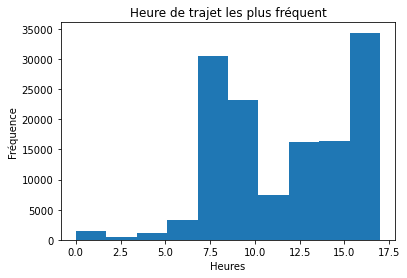

In [10]:
#Histogramme de fréquence sur les heures de trajets
df['debut_heure'].plot(kind = 'hist')
plt.title ('Heure de trajet les plus fréquent')
plt.xlabel ('Heures')
plt.ylabel ('Fréquence')
plt.show ()

**Commentaire**: en terme de la période du jour, que sa soit les matin ou les après midi les trajets sont plus ou moins fréquents. On peur aussi remaquer que dans notre base de donnée il n'y a aucun trajet la nuit

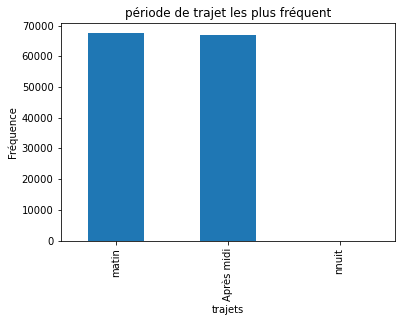

In [11]:
#Histogramme de fréquence sur les périodes de trajets les plus fréquents 
df['période_jour'].value_counts().plot(kind = 'bar')
plt.title ('période de trajet les plus fréquent')
plt.xlabel ('trajets')
plt.ylabel ('Fréquence')
plt.show ()

les jour ou les trajets sont le plus fréquents sont le Jeudi, Mardi, Vendredi, et Mercredi.

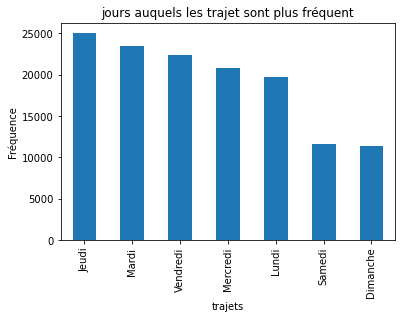

In [12]:
df['debut_semaine_char'].value_counts().plot(kind = 'bar')
plt.title ('jours auquels les trajet sont plus fréquent')
plt.xlabel ('trajets')
plt.ylabel ('Fréquence')
plt.show ()

## Le temps que dure un trajet moyen

Ces statistiques nous montrent que la durée minimum d'un trajet est d'environ 1 minute, moyenement un trajet dure 12 minutes, la durée maximum d'un trajet est d'environ 1409 minutes soit environ 23h.

In [13]:
# Durée de trajets 
df['duration_sec'].describe()

count    134434.000000
mean        714.751625
std        1611.048982
min          61.000000
25%         329.000000
50%         519.000000
75%         800.000000
max       84548.000000
Name: duration_sec, dtype: float64

## Le top 8 des stations de départs dans lesquelles les trajets sont le plus fait

In [14]:
#  identification de 8 stations de départs sur lesquelles les trajets sont leplus effectuées.
dep_Stations = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top8 = df.loc[df['start_station_name'].isin(dep_Stations)]

In [15]:
# Après avoir sous-défini les top 8 des stations avec le plus de trajets, nous allons tracer un diagramme en bâton pour voir la distribution 
# et l’ordre du top 1 au top 8
dep_stat_counts = df_top8['start_station_name'].value_counts()
dep_stat_ordre = dep_stat_counts.index

**Commenataire**: Ce graphe nous montre que la station "Market St at 10th St" occupe la prmière place de notre classement et la station "The Embarcadero at Sansome St" occupe la dernière place de notre classement.

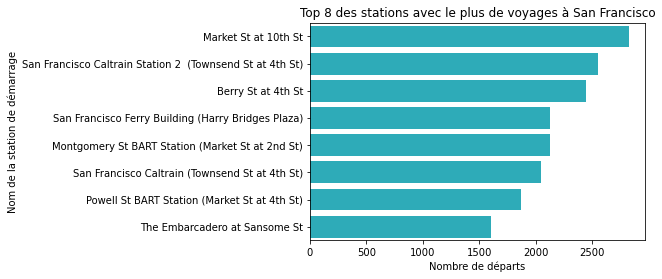

In [16]:
#  diagramme en bâton des top 8 des stations 
base_color = sb.color_palette()[9]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=dep_stat_ordre)
plt.xlabel('Nombre de départs')
plt.ylabel('Nom de la station de démarrage')
plt.title('Top 8 des stations avec le plus de voyages à San Francisco');

**Commentaire**: Avec la trasformation logarithmique, on vois que l'age est normalement distribuée

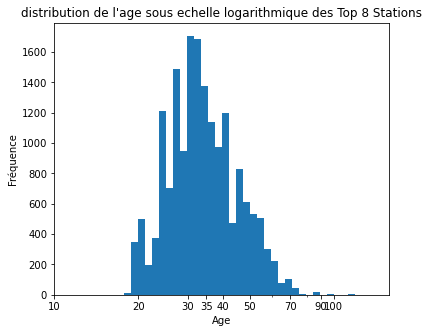

In [17]:
 #On remarque plus haut qu'il y'a une longue traine dans la distribution donc metton sous echelle avec logarithme
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[6, 5])
plt.hist(data = df_top8, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.title('distribution de l\'age sous echelle logarithmique des Top 8 Stations');

## La répartition en termes d'age, de genre et type d'utilisateurs de ceux qui font le plus de trajets

**Commentaire**: 
Premièrement nous pouvons voir que par exemple dans la station de "San Francisco Caltrain Station 2 (Townsend St at 4th St)" la plus par des débuts de trajets sont reélisée le matin
Deuxiènement, On vois que dans la plus part des stations, le Jeudi, Mardi et vendredi sont les jour sur les quels les trajets sont le plus effectuées

In [18]:
# Preparation des listes des variables numériques et catégorielles
numeric_vars = ['age','duration_sec']
times_chr = ['période_jour','debut_semaine_char']
users_chr = ['user_type','member_gender']

In [19]:
# Nous allons ordonner les stations qui ont le plus de trajets en ordre décroissant
loc_cl = locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
df_top8['start_station_name'] = df_top8['start_station_name'].astype(loc_cl2)

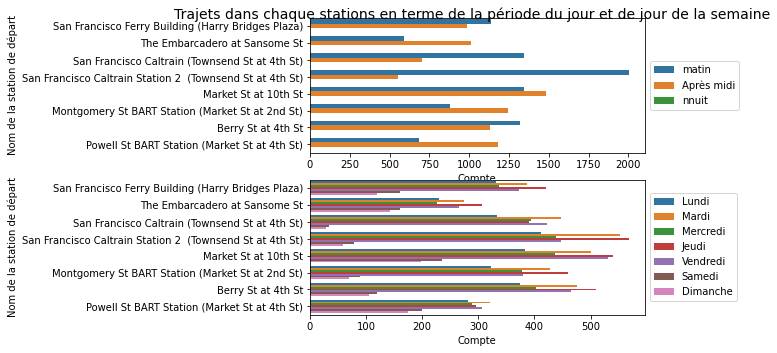

In [20]:
#Traçage des variables catégorièlles : Nombre de trajets en terme de la période du jour et de jour de la semaine 
# dans les 8 meilleures stations
fig = plt.figure(figsize=(6,5))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trajets dans chaque stations en terme de la période du jour et de jour de la semaine', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=times_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Nom de la station de départ')
    plt.xlabel('Compte');

**Commentaire**:  
Dans le premier graphique nous voyons que les abonné sont plus nombreux que les clients quelque soit la station
Dans un second temps, On vois que le sexe masculin est la plus grande partie des riders

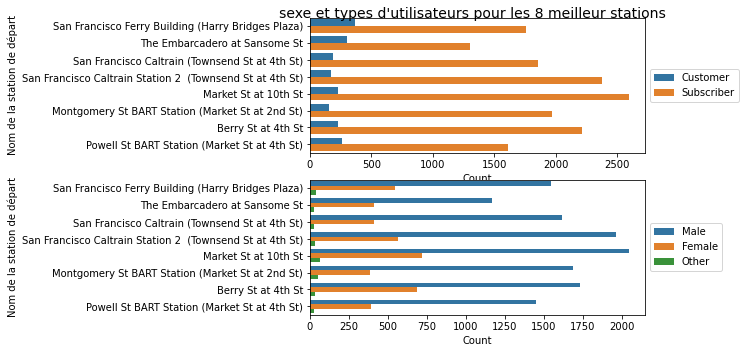

In [21]:
# Diagramme en batôn du sexe et du types d'utilisateurs pour les 8 meilleur stations
fig = plt.figure(figsize=(6,5))
plt.subplots_adjust(top=0.95)
fig.suptitle('sexe et types d\'utilisateurs pour les 8 meilleur stations' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Nom de la station de départ')
    plt.xlabel('Count');

**Commentaire**: 
Après transformation logarithmique, la valeur médiane de l'age se situe entre 30 et 40 ans
La durée du trajet quand à elle, la valeur médiane se situe entre 550 et 650 secondes

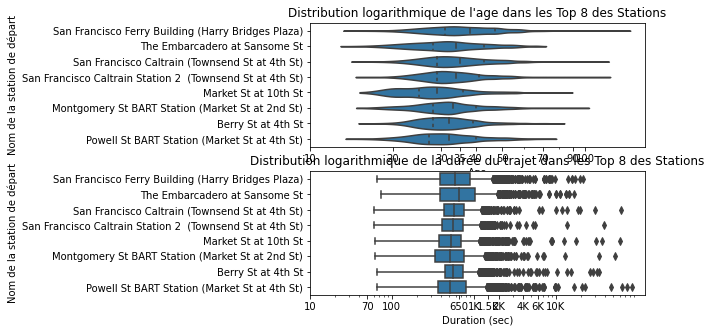

In [22]:
# It looks like the majority of data squeeze in the first half of plots. Let's see log transform.
# For duration of trips: avoid messiness of violin plots, I plot boxplots instead.
plt.figure(figsize=(6,5))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=df_top8, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.ylabel('Nom de la station de départ')
plt.xlabel('Age')
plt.title('Distribution logarithmique de l\'age dans les Top 8 des Stations')

ax = plt.subplot(212)
sb.boxplot(data=df_top8, y='start_station_name', x='duration_sec',color=base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)')
plt.ylabel('Nom de la station de départ')
plt.title('Distribution logarithmique de la durée du trajet dans les Top 8 des Stations');

##  la répartion de la durée du trajet en ter de période du jour, et jour de la semaine.

**Commentaire**: 
On vois de part ces graphiques que les clients font plus de trajet les après midi que la matinée notamment dans les Stations: San Francisco Ferry Bulding(Harry Bridges Plaza), The Embarcadero at Sansome St et Powell St BART Station (Market St at 4th St)
En outre on vois que pour les abonnés, la plus part des trajets sont fait la matinée par exemple pour la station San Francisco Caltrain Station 2 (Townsend St at 4th St).

In [23]:
# Dans nos 8 meilleurs station, nous allons séparer les clients des abonnées
df_cust = df_top8.query('user_type == "Customer"')
df_sub = df_top8.query('user_type == "Subscriber"')

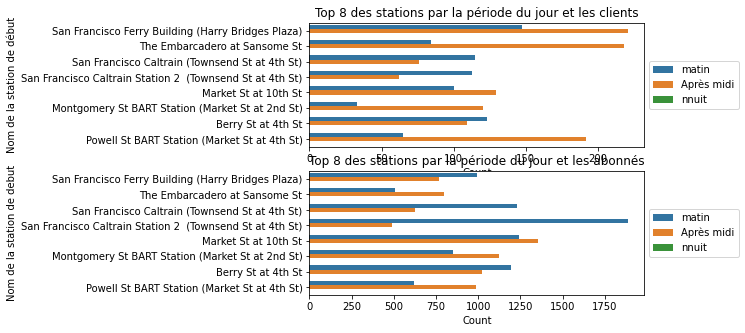

In [24]:
# Diagramme en baton pour la période jour: matin, Soir et la nuit entre les clients et les abonnés
plt.figure(figsize=(6,5))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 des stations par la période du jour et les clients')
plt.xlabel('Count')
plt.ylabel('Nom de la station de début')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 des stations par la période du jour et les abonnés')
plt.xlabel('Count')
plt.ylabel('Nom de la station de debut');

**Commentaire**: 
On vois ici que par exemple dans la station The Embarcadero at Sansome St, la plus part des trajet sont faits par les clients
le samédi et le dimanche en outre pour la station San Francisco Ferry Bulding(Harry Bridges Plaza) la plus part
des trajets sont fait le Lundi et le Vendredi
On vois aussi que pour les abonnées, la plus part des trajets sont fait le Mardi et Jeudi dans les 8 stations. 
Mais il y en a plus de trajet dans la station San Francisco Caltrain Station 2 (Townsend St at 4th St)

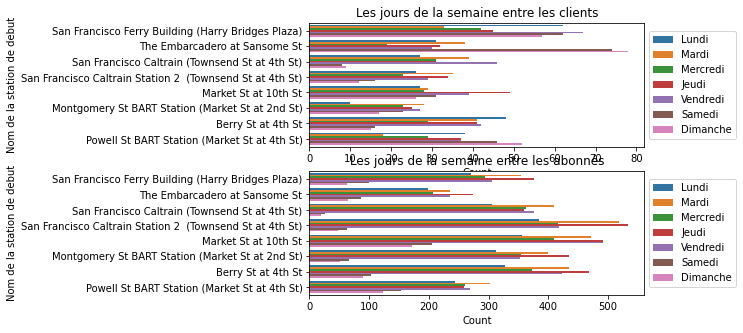

In [25]:
# Les jours de la semaine entre les clients et les abonnés.
plt.figure(figsize=(6,5))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='debut_semaine_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Les jours de la semaine entre les clients')
plt.ylabel('Nom de la station de debut')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='debut_semaine_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Les jours de la semaine entre les abonnés')
plt.ylabel('Nom de la station de debut')
plt.xlabel('Count');

**Commentaire**: On voit que que ça soit les hommes ou les femmes, dans nos 8 meilleur stations les gens font le plus de trajet la matinée en particulie dans la station San Francisco Caltrain Station 2 (Townsend St at 4th St)

In [26]:
# Séparation du genre pour les femme et les hommes
df_f = df_top8.query('member_gender == "Female"')
df_m = df_top8.query('member_gender == "Male"')

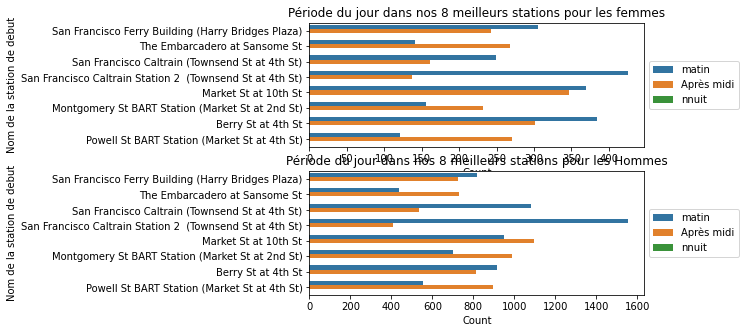

In [27]:
# Période du jour dans nos 8 meilleurs stations par genre de sexe
plt.figure(figsize=(6,5))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Période du jour dans nos 8 meilleurs stations pour les femmes')
plt.xlabel('Count')
plt.ylabel('Nom de la station de debut')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Période du jour dans nos 8 meilleurs stations pour les Hommes')
plt.xlabel('Count')
plt.ylabel('Nom de la station de debut');

In [28]:
!jupyter nbconvert Part_II_slide_deck_template_Patrick.ipynb --to slides --post serve --no-input --no-prompt

^C
